# Hw6

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

$y = 2 + x + 2x^{2} + \varepsilon$, for $x$ in $(-1, 1)$

In [2]:
def f(x):
    return 2 + x + 2*x**2

In [3]:
x = np.linspace(-1, 1, 200)
fun_data = np.array([f(i) for i in x])
epsilon = np.random.normal(0, 0.1, 200)
lam = np.linspace(0.01, 0.99, 20)
y = fun_data + epsilon

In [4]:
x_train = x[0:160].reshape(160, 1)
y_train = y[0:160].reshape(160, 1)
x_pre = x[160:].reshape(40, 1)
y_pre = y[160:].reshape(40, 1)

## (a)

In [5]:
H_xtrain = np.hstack([np.power(x_train, i) for i in range(0, 51)])
H_xtest = np.hstack([np.power(x_pre, i) for i in range(0, 51)])
print("H(Xtrain) = \n", H_xtrain)

H(Xtrain) = 
 [[ 1.00000000e+00 -1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
  -1.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00 -9.89949749e-01  9.80000505e-01 ...  6.15787953e-01
  -6.09599129e-01  6.03472505e-01]
 [ 1.00000000e+00 -9.79899497e-01  9.60203025e-01 ...  3.77323347e-01
  -3.69738958e-01  3.62307019e-01]
 ...
 [ 1.00000000e+00  5.77889447e-01  3.33956213e-01 ...  3.70295700e-12
   2.13989978e-12  1.23662550e-12]
 [ 1.00000000e+00  5.87939698e-01  3.45673089e-01 ...  8.47176102e-12
   4.98088462e-12  2.92845980e-12]
 [ 1.00000000e+00  5.97989950e-01  3.57591980e-01 ...  1.91120151e-11
   1.14287929e-11  6.83430331e-12]]


In [6]:
A_list = []
for i in lam:
    B = np.linalg.inv(np.dot(H_xtrain.T, H_xtrain) + i*np.identity(51))
    A = np.dot(np.dot(B, H_xtrain.T), y_train)
    A_list.append(A)

# for i, j in enumerate(A_list):
#     print(f"{i} : \n", j)
#     print("===========================================================")

In [7]:
f_xtest_list = []
f_xtrain_list = []

for i in A_list:
    f_xtest = np.dot(H_xtest, i)
    f_xtrain = np.dot(H_xtrain, i)
    
    f_xtest_list.append(f_xtest)
    f_xtrain_list.append(f_xtrain)

In [8]:
train_error_list = []

for i in f_xtrain_list:
    error_train = np.sqrt(np.dot((i - y_train).T, (i - y_train)))
    train_error_list.append(error_train)

train_error_list = [i[0][0] for i in train_error_list]
train_error_array = np.array(train_error_list)
print("train error : \n", train_error_array)

train error : 
 [1.1159684  1.12923749 1.13804143 1.14702186 1.15692901 1.1678332
 1.17965228 1.19227089 1.2055735  1.21945401 1.2338181  1.24858306
 1.26367686 1.27903697 1.29460921 1.31034671 1.32620896 1.34216099
 1.35817263 1.3742179 ]


In [9]:
test_error_list = []

for i in f_xtest_list:
    error_test = np.sqrt(np.dot((i - y_pre).T, (i - y_pre)))
    test_error_list.append(error_test)

test_error_list = [i[0][0] for i in test_error_list]
test_error_array = np.array(test_error_list)
print("test error : \n", test_error_array)

test error : 
 [2.0620213  0.80785335 1.0351899  1.04300403 0.98520526 0.91206222
 0.84510575 0.79581365 0.77053217 0.77147253 0.7971418  0.84351993
 0.90568964 0.97907916 1.0600054  1.14572336 1.23426863 1.32426296
 1.41474802 1.50506055]


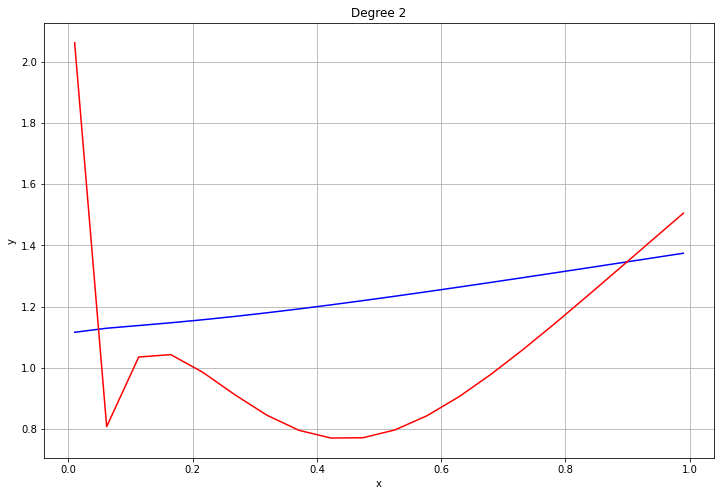

In [10]:
plt.figure(figsize=(12, 8))
plt.plot(lam, train_error_array, 'b-')
plt.plot(lam, test_error_array, 'r-')
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.title("Degree 2")
plt.show()